In [2]:
import pandas as pd

In [3]:
df09 = pd.read_csv("/content/Year 2009-2010.csv", encoding='ISO-8859-1')
df10 = pd.read_csv("/content/Year 2010-2011.csv", encoding='ISO-8859-1')

In [4]:
df09.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [6]:
# prompt: Aggregate the sales data on a monthly basis. Calculate the total revenue and total quantity sold for each month. Create a new column for total sales (‘TotalPrice’) by multiplying ‘Quantity’ by ‘Price’.

import pandas as pd
# Combine the dataframes
df = pd.concat([df09, df10], ignore_index=True)

# Convert the 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for total sales
df['TotalPrice'] = df['Quantity'] * df['Price']

# Aggregate the sales data on a monthly basis
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period("M"))[['TotalPrice', 'Quantity']].sum().reset_index()

# Rename the columns for better readability
monthly_sales.rename(columns={'TotalPrice': 'TotalRevenue', 'Quantity': 'TotalQuantitySold'}, inplace=True)

print(monthly_sales)


   InvoiceDate  TotalRevenue  TotalQuantitySold
0      2009-12    799847.110             420088
1      2010-01    624032.892             375363
2      2010-02    533091.426             368402
3      2010-03    765848.761             489370
4      2010-04    590580.432             351971
5      2010-05    615322.830             364095
6      2010-06    679786.610             388253
7      2010-07    575236.360             302201
8      2010-08    656776.340             451803
9      2010-09    853650.431             478262
10     2010-10   1045168.350             601729
11     2010-11   1422654.642             673856
12     2010-12   1126445.470             508876
13     2011-01    560000.260             308966
14     2011-02    498062.650             277989
15     2011-03    683267.080             351872
16     2011-04    493207.121             289098
17     2011-05    723333.510             380391
18     2011-06    691123.120             341623
19     2011-07    681300.111            

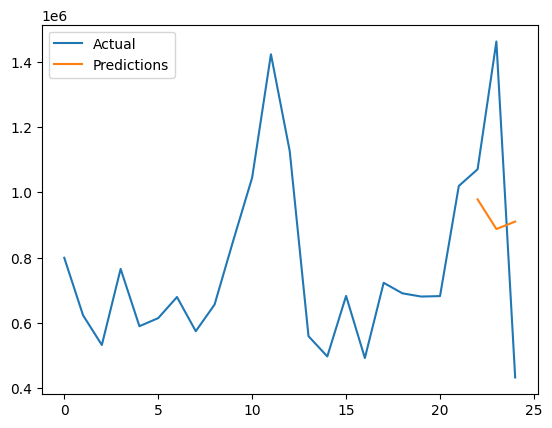

Forecasted sales for the next quarter: 22    978654.895162
23    887921.694614
24    910651.800306
Name: predicted_mean, dtype: float64


In [7]:
# prompt: Apply the insights to forecast sales for the next quarter using basic time series analysis methods.

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Select the 'TotalRevenue' column for forecasting
data = monthly_sales['TotalRevenue']

# Split the data into training and testing sets
train_data = data[:-3]  # Use all but the last 3 months for training
test_data = data[-3:]   # Use the last 3 months for testing

# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

# Make predictions for the next quarter (3 months)
predictions = model_fit.predict(start=len(train_data), end=len(data)-1)

# Plot the actual values and predictions
plt.plot(data, label='Actual')
plt.plot(range(len(train_data), len(data)), predictions, label='Predictions')
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted sales for the next quarter:", predictions)


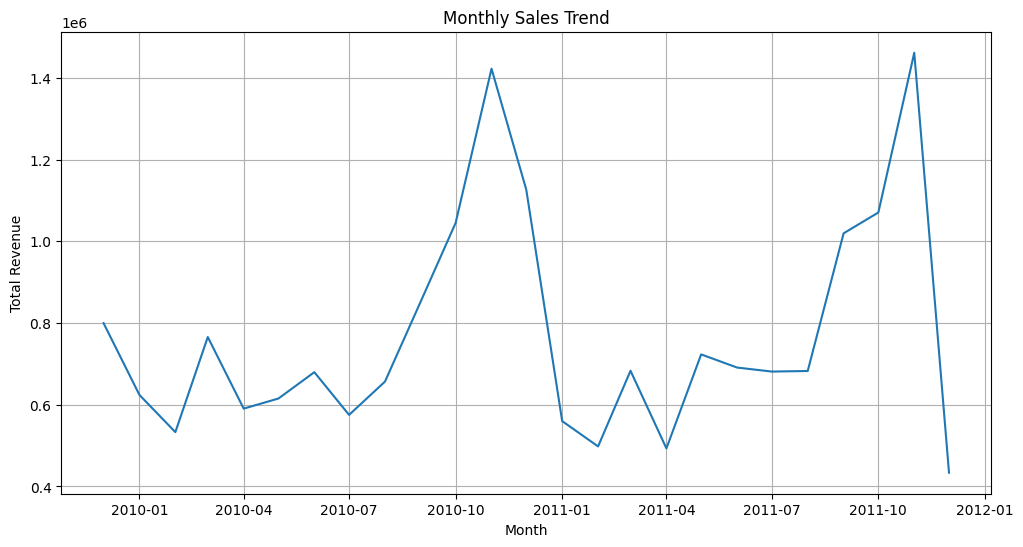

In [9]:
# prompt: Plot the monthly sales data to visualize trends, seasonality, or any anomalies. Use matplotlib or seaborn to create line plots showing the total revenue over time.

import matplotlib.pyplot as plt

# Convert 'InvoiceDate' to timestamps
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

# Plot the monthly sales data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['TotalRevenue'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

SMA forecast for the next quarter: 891635.8621666665


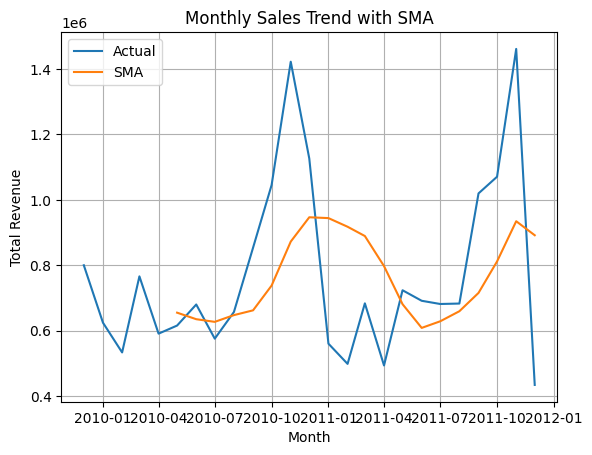

"\nSimple Moving Average (SMA) provides a basic forecast by averaging the \nsales data over a specified period. This method helps to smooth out short-term \nfluctuations and identify the overall trend. \n\nHowever, SMA has limitations:\n\n- It lags behind the actual data due to the averaging process.\n- It gives equal weight to all data points within the window, which might \n  not be appropriate for all time series data.\n- It doesn't account for seasonality or trends in the data.\n- It can be sensitive to outliers.\n\nTherefore, SMA is a simple and quick method for forecasting, but it should \nbe used with caution and in conjunction with other forecasting techniques \nfor more accurate predictions.\n"

In [10]:
# prompt: Apply a simple moving average (SMA) for the next quarter’s sales forecast. Calculate the SMA based on the last few months’ sales data. Discuss how this method provides a basic forecast and its limitations.

import matplotlib.pyplot as plt
# Calculate the SMA for the last 6 months
window_size = 6
sma = monthly_sales['TotalRevenue'].rolling(window=window_size).mean()

# Get the last 6 months' data
last_6_months = monthly_sales['TotalRevenue'].tail(window_size)

# Calculate the SMA for the next quarter
next_quarter_sma = last_6_months.mean()

print("SMA forecast for the next quarter:", next_quarter_sma)

# Plot the actual values and SMA
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['TotalRevenue'], label='Actual')
plt.plot(monthly_sales['InvoiceDate'], sma, label='SMA')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend with SMA')
plt.legend()
plt.grid(True)
plt.show()

# Discuss the method and its limitations
"""
Simple Moving Average (SMA) provides a basic forecast by averaging the
sales data over a specified period. This method helps to smooth out short-term
fluctuations and identify the overall trend.

However, SMA has limitations:

- It lags behind the actual data due to the averaging process.
- It gives equal weight to all data points within the window, which might
  not be appropriate for all time series data.
- It doesn't account for seasonality or trends in the data.
- It can be sensitive to outliers.

Therefore, SMA is a simple and quick method for forecasting, but it should
be used with caution and in conjunction with other forecasting techniques
for more accurate predictions.
"""


**Discuss the potential of AI in enhancing the accuracy and efficiency of data analysis.**

It can be very useful to use something like Gemini and make tasks more straightforward and fast. However, it is better to truly understand the data before using something like Gemini. If the data is understood then you can see if what Gemini is doing is correct or needs some adjustments. Without understanding the data it is easier to make a mistake, and if this data is shared with others - it might mean an incorrect decision is made.